<a href="https://colab.research.google.com/github/HLTT14/Social-and-Economic-Networks/blob/main/HW5/SEN_HW5_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

## Download Dataset

In [1]:
!git clone https://github.com/HLTT14/Social-and-Economic-Networks.git

Cloning into 'Social-and-Economic-Networks'...
remote: Enumerating objects: 87, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 87 (delta 2), reused 12 (delta 1), pack-reused 71
Unpacking objects: 100% (87/87), done.


## Import Libraries

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Initialization

## Read Files

In [3]:
with open("/content/Social-and-Economic-Networks/HW5/CA-GrQc.txt") as file:
    lines = file.readlines()
    edges = []
    for line in lines:
        edges.append(tuple(line.split()))

# Main

## Create Graph

In [4]:
DG = nx.DiGraph()
DG.add_edges_from(edges)

## Convert to Undirected Graph

In [5]:
G = DG.to_undirected()

## Remove Selfloops

In [6]:
G.remove_edges_from(nx.selfloop_edges(G))

In [7]:
G.edges('7546')

EdgeDataView([('7546', '12425'), ('7546', '7088'), ('7546', '18366'), ('7546', '25217')])

## A. Calculate Total Utility to Efficient Network Total Utility Ratio

In [8]:
utilities = []
for n in G.nodes:
  utility = 0
  for e in G.edges(n):
    utility += 1/G.degree[e[0]] + 1/G.degree[e[1]] + 1/(G.degree[e[0]] * G.degree[e[1]])
  utilities.append(utility)

total_utility = sum(utilities)

In [9]:
N = G.number_of_nodes()
efficient_network_tatal_utility = N * 3

In [10]:
print(total_utility / efficient_network_tatal_utility)

0.7606117267778175


## B. Utility Function Distribution

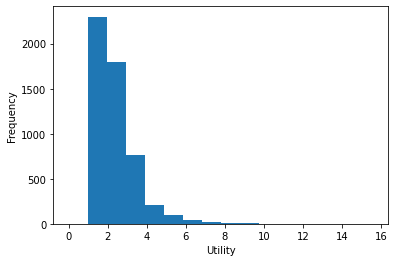

In [11]:
plt.hist(utilities, bins=16)
plt.ylabel('Frequency')
plt.xlabel('Utility');

## C. Degree Distribution

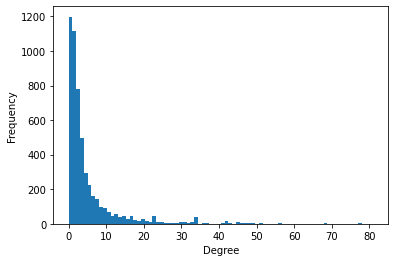

In [12]:
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees, bins=80)
    plt.ylabel('Frequency')
    plt.xlabel('Degree');

## D. Max Neighbor Degree Distribution

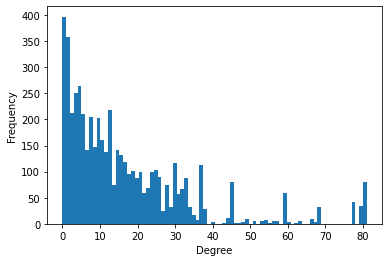

In [13]:
neighbors_max_degree = []
for n in G.nodes:
  neighbors_max_degree.append(max([G.degree[x] for x in G.neighbors(n)], default=0))

plt.hist(neighbors_max_degree, bins=80)
plt.ylabel('Frequency')
plt.xlabel('Degree');

## E. Ratio of Stable Edges to All Edges

In [17]:
def node_utility(n, g):
  utility = 0
  for e in g.edges(n):
    utility += 1/g.degree[e[0]] + 1/g.degree[e[1]] + 1/(g.degree[e[0]] * g.degree[e[1]])
  return utility

stable_edges_count = 0
for e in G.edges:
  T = G.copy()
  T.remove_edge(*e)
  if node_utility(e[0], G) >= node_utility(e[0], T) and node_utility(e[1], G) >= node_utility(e[1], T):
    stable_edges_count += 1

print(stable_edges_count / G.number_of_edges())

0.9415216790941728


## F. Ratio of Positive Non Existing Edges to All Non Existing Edges

In [ ]:
positive_edges_count = 0
for e in nx.non_edges(G):
  u, v = e
  T = G.copy()
  T.add_edge(u, v)
  node_utility_u_in_G = node_utility(u, G)
  node_utility_u_in_T = node_utility(u, T)
  node_utility_v_in_G = node_utility(v, G)
  node_utility_v_in_T = node_utility(v, T)
  if (node_utility_u_in_T > node_utility_u_in_G and node_utility_v_in_T >= node_utility_v_in_G):
    positive_edges_count += 1
  if (node_utility_v_in_T > node_utility_v_in_G and node_utility_u_in_T >= node_utility_u_in_G):
    positive_edges_count += 1
  
print(positive_edges_count / len(list(nx.non_edges(G))))